<a href="https://colab.research.google.com/github/SGhuman123/Data-Science-Portfolio/blob/main/Hotels_Analytics_Project/Uncovering_underlying_themes/Uncovering_underlying_themes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About

This is about understanding the public sentiments of ABC’s chain of
hotels. We have been presented with a review dataset on guests who had
stayed in an ABC hotel prior. With the provided dataset, we need to:

* Provide a view on the distribution of sentiments (**positive, negative, or neutral**) for the reviews. Candidates are required to come up with a detailed explanation of the approach used in their attempt.
* Generate a visualization of the most prominent words (by count) that are
present in the reviews.
* Perform data cleaning by applying suitable text pre-processing techniques, if
necessary. Candidates should provide a rationale for their chosen approach.
* Utilise topic modelling techniques to uncover top topics/keywords mentioned in the reviews. Candidates are to provide a detailed explanation of the approach and provide examples of how business teams could leverage the outputs
generated.

## Load and analyze Dataset

In [ ]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [ ]:
df = pd.read_csv("hotel_reviews.csv")

* Use the `sample` method to look at some random reviews present in our dataset


In [ ]:
df.sample(10)

,Review,Rating
2713,attended conference punta cana held barcelo ba...,2
2125,tthe worst hotel experienced read bad reviews ...,1
3184,"nice bed breakfast nice thing, booked hotel ea...",2
884,fantastic value hong kong island stayed bishop...,4
1707,"surly staff baking hot room, booked lastminute...",2
1380,"avoid like plague terrible hotel, no hot water...",1
2512,"no swimmer, hotel oke swimming pool oke, want ...",2
853,"better inside, peninsula palace looks terrible...",4
1693,nice location fisherman wharf-beautiful nautic...,4
1692,"great place wedding, worried hotel bad reviews...",5


## Provide a view on the distribution of sentiments (**positive, negative, or neutral**) for the reviews. Candidates are required to come up with a detailed explanation of the approach used in their attempt.

Distribution of sentiments were done by looking at the ratings.

* **Positive** - Ratings of 4 and 5
* **Neutral** - Rating of 3
* **Negative** - Ratings of 1 and 2

Let's first have an idea of the distribution of the ratings.

### First we find the total number of reviews

In [ ]:
print("Number of reviews: {}".format(len(df)))

Number of reviews: 3593


### Now let us visualize the distribution of the ratings.

* Import the `pyplot` module from the matplotlib package

In [ ]:
import matplotlib.pyplot as plt

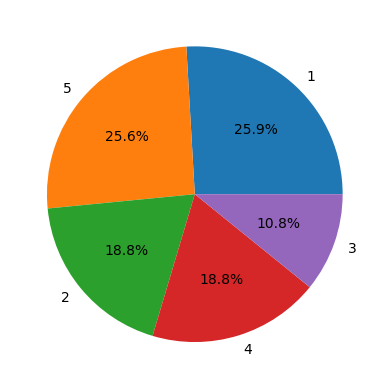

In [ ]:
rating_count = df["Rating"].value_counts()
plt.pie(rating_count, labels=rating_count.index,
        autopct='%1.1f%%')
plt.show()

From this we can tell:
* **Positive Reviews** should be around **44.4%**
* **Neutral Reviews** should be around **10.8%**
* **Negative Reviews** should be around **44.7%**



### Now let's create a function to map rating to the sentiments

In [ ]:
# Define a function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [4, 5]:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    elif rating in [1, 2]:
        return 'Negative'
    else:
        return 'Unknown'  # In case there are unexpected rating values

In [ ]:
# Apply the function to create the sentiment column
df['Sentiment'] = df['Rating'].apply(map_sentiment)

In [ ]:
df.sample(10)

,Review,Rating,Sentiment
158,satisfactory stay husband stayed broadway mano...,2,Negative
736,"super location small room tiiiiiiiny room, cle...",3,Neutral
1073,loved pr hated coral sea entrance ok elevator ...,1,Negative
2959,great boutique hotel stayed hotel andra busine...,4,Positive
1271,poor service average room poor customer servic...,2,Negative
2120,great stay residence inn ca n't agree excellen...,5,Positive
2592,"really good time just got week stay, business ...",4,Positive
3085,great hotel great place brochure stated orchar...,5,Positive
2390,great hotel went sofitel celebrate birthday fr...,5,Positive
601,terrible service called hotel change reservati...,1,Negative


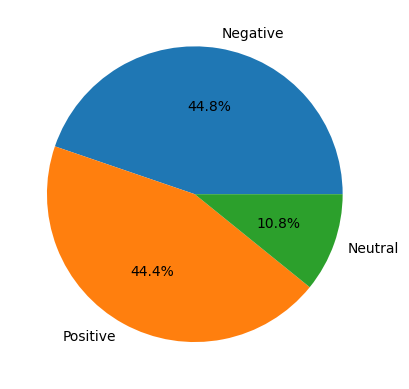

In [ ]:
sentiment_count = df["Sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%')
plt.show()

Let's now find out exactly how many positive, neutral and negative reviews we have.

In [ ]:
print("Number of positive reviews: {}".format(df[df["Sentiment"]=="Positive"].count()[0]))
print("Number of neutral reviews: {}".format(df[df["Sentiment"]=="Neutral"].count()[0]))
print("Number of negative reviews: {}".format(df[df["Sentiment"]=="Negative"].count()[0]))

Number of positive reviews: 1596
Number of neutral reviews: 389
Number of negative reviews: 1608


## Generate a visualization of the most prominent words (by count) that are present in the reviews.

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the reviews.

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import re

### What are the words most often present in positive reviews?

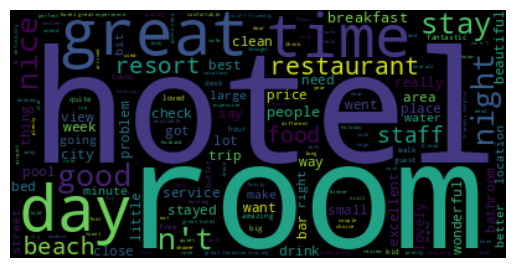

In [ ]:
pos_reviews = df[df["Sentiment"]=="Positive"]
txt = " ".join(reviews.lower() for reviews in pos_reviews["Review"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Filter the reviews with positive sentiment
positive_reviews = df[df["Sentiment"] == "Positive"]

# Join all the reviews into a single string and convert to lower case
positive_txt = " ".join(review.lower() for review in positive_reviews["Review"])

# Remove non-alphabetic characters using regex
positive_txt = re.sub(r'[^a-z\s]', '', positive_txt)

# Split the string into words
positive_words = positive_txt.split()

# Count the frequency of each word
positive_word_counts = Counter(positive_words)

# Get the top 20 most common positive words
positive_top_20_words = positive_word_counts.most_common(20)

# Print the top 20 positive words and their counts
for word, count in positive_top_20_words:
    print(f"{word}: {count}")

hotel: 3610
room: 2284
not: 1869
great: 1852
nt: 1386
staff: 1326
good: 1288
stay: 1091
did: 951
just: 926
rooms: 898
location: 897
nice: 828
stayed: 820
beach: 787
time: 749
clean: 744
day: 717
food: 691
breakfast: 689


### What are the words most often present in neutral reviews?

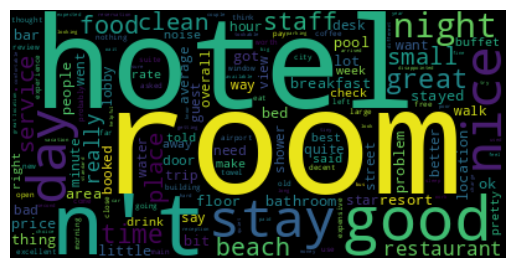

In [ ]:
neu_reviews = df[df["Sentiment"]=="Neutral"]
txt = " ".join(reviews.lower() for reviews in neu_reviews["Review"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Filter the reviews with neutral sentiment
neutral_reviews = df[df["Sentiment"] == "Neutral"]

# Join all the reviews into a single string and convert to lower case
neutral_txt = " ".join(review.lower() for review in neutral_reviews["Review"])

# Remove non-alphabetic characters using regex
neutral_txt = re.sub(r'[^a-z\s]', '', neutral_txt)

# Split the string into words
neutral_words = neutral_txt.split()

# Count the frequency of each word
neutral_word_counts = Counter(neutral_words)

# Get the top 20 most common neutral words
neutral_top_20_words = neutral_word_counts.most_common(20)

# Print the top 20 neutral words and their counts
for word, count in neutral_top_20_words:
    print(f"{word}: {count}")

not: 825
hotel: 821
room: 722
nt: 374
good: 331
did: 295
no: 295
great: 231
location: 229
stay: 223
rooms: 217
staff: 215
just: 211
nice: 205
stayed: 179
small: 170
beach: 167
night: 165
service: 159
food: 153


### What are the words most often present in negative reviews?

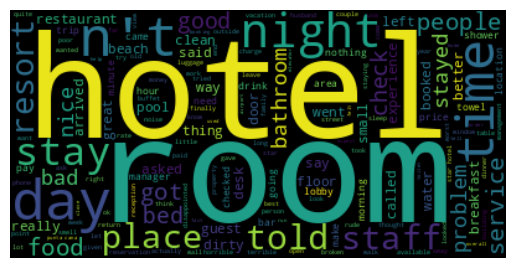

In [ ]:
neg_reviews = df[df["Sentiment"]=="Negative"]
txt = " ".join(reviews.lower() for reviews in neg_reviews["Review"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Filter the reviews with negative sentiment
negative_reviews = df[df["Sentiment"] == "Negative"]

# Join all the reviews into a single string and convert to lower case
negative_txt = " ".join(review.lower() for review in negative_reviews["Review"])

# Remove non-alphabetic characters using regex
negative_txt = re.sub(r'[^a-z\s]', '', negative_txt)

# Split the string into words
negative_words = negative_txt.split()

# Count the frequency of each word
negative_word_counts = Counter(negative_words)

# Get the top 20 most common negative words
negative_top_20_words = negative_word_counts.most_common(20)

# Print the top 20 negative words and their counts
for word, count in negative_top_20_words:
    print(f"{word}: {count}")

not: 4066
hotel: 3868
room: 3533
nt: 1806
no: 1732
did: 1383
stay: 1231
rooms: 1036
staff: 1033
service: 944
night: 915
day: 830
just: 824
time: 742
told: 719
stayed: 691
good: 690
desk: 662
like: 650
got: 641


Now let's get an overview of the top 10 positive, neutral and negative words together.

In [ ]:
# Print the top 20 positive words and their percentage share in total postive words
print("Positive words")
for word, count in positive_top_20_words:
    print(f"{word}: {count}")

# Print the top 20 neutral words and their percentage share in total postive words
print("\nNeutral words\n")
for word, count in neutral_top_20_words:
    print(f"{word}: {count}")

# Print the top 20 negative words and their percentage share in total postive words
print("\nNegative words")
for word, count in negative_top_20_words:
    print(f"{word}: {count}")

Positive words
hotel: 3610
room: 2284
not: 1869
great: 1852
nt: 1386
staff: 1326
good: 1288
stay: 1091
did: 951
just: 926
rooms: 898
location: 897
nice: 828
stayed: 820
beach: 787
time: 749
clean: 744
day: 717
food: 691
breakfast: 689

Neutral words

not: 825
hotel: 821
room: 722
nt: 374
good: 331
did: 295
no: 295
great: 231
location: 229
stay: 223
rooms: 217
staff: 215
just: 211
nice: 205
stayed: 179
small: 170
beach: 167
night: 165
service: 159
food: 153

Negative words
not: 4066
hotel: 3868
room: 3533
nt: 1806
no: 1732
did: 1383
stay: 1231
rooms: 1036
staff: 1033
service: 944
night: 915
day: 830
just: 824
time: 742
told: 719
stayed: 691
good: 690
desk: 662
like: 650
got: 641


In [ ]:
print("Number of positive reviews: {}".format(df[df["Sentiment"]=="Positive"].count()[0]))
print("Number of neutral reviews: {}".format(df[df["Sentiment"]=="Neutral"].count()[0]))
print("Number of negative reviews: {}".format(df[df["Sentiment"]=="Negative"].count()[0]))

Number of positive reviews: 1596
Number of neutral reviews: 389
Number of negative reviews: 1608


There is an issue of trying to draw insights from the count value and as we can see above positive and negative reviews tend to far outweight the neutral reviews in size.

As such, we switch things up to calculate the percentage share of each word out of all the neutral words instead of just their counts.

Likewise, we shall do the same for positive and negative reviews.

In [ ]:
# Calculate the total number of positive words
positive_total_words = sum(positive_word_counts.values())

# Get the top 20 most common positive words
positive_top_20_words = positive_word_counts.most_common(20)

# Print the top 20 positive words and their counts
print("Positive words")
for word, count in positive_top_20_words:
    percentage = (count / positive_total_words) * 100
    print(f"{word}: {percentage:.2f}%")

# Calculate the total number of neutral words
neutral_total_words = sum(neutral_word_counts.values())

# Get the top 20 most common neutral words
neutral_top_20_words = neutral_word_counts.most_common(20)

# Print the top 20 neutral words and their counts
print("\nNeutral words")
for word, count in neutral_top_20_words:
    percentage = (count / neutral_total_words) * 100
    print(f"{word}: {percentage:.2f}%")

# Calculate the total number of negative words
negative_total_words = sum(negative_word_counts.values())

# Get the top 20 most common negative words
negative_top_20_words = negative_word_counts.most_common(20)

# Print the top 20 negative words and their counts
print("\nNegative words")
for word, count in negative_top_20_words:
    percentage = (count / negative_total_words) * 100
    print(f"{word}: {percentage:.2f}%")

Positive words
hotel: 2.36%
room: 1.50%
not: 1.22%
great: 1.21%
nt: 0.91%
staff: 0.87%
good: 0.84%
stay: 0.71%
did: 0.62%
just: 0.61%
rooms: 0.59%
location: 0.59%
nice: 0.54%
stayed: 0.54%
beach: 0.52%
time: 0.49%
clean: 0.49%
day: 0.47%
food: 0.45%
breakfast: 0.45%

Neutral words
not: 2.34%
hotel: 2.33%
room: 2.05%
nt: 1.06%
good: 0.94%
did: 0.84%
no: 0.84%
great: 0.66%
location: 0.65%
stay: 0.63%
rooms: 0.62%
staff: 0.61%
just: 0.60%
nice: 0.58%
stayed: 0.51%
small: 0.48%
beach: 0.47%
night: 0.47%
service: 0.45%
food: 0.43%

Negative words
not: 2.53%
hotel: 2.40%
room: 2.19%
nt: 1.12%
no: 1.08%
did: 0.86%
stay: 0.76%
rooms: 0.64%
staff: 0.64%
service: 0.59%
night: 0.57%
day: 0.52%
just: 0.51%
time: 0.46%
told: 0.45%
stayed: 0.43%
good: 0.43%
desk: 0.41%
like: 0.40%
got: 0.40%


### What we can learn from the visualisation
From the results, we can understand that some words that are **more frequent in positive reviews that aren't as frequent in negative or neutral reviews** are:
* **great**: Positive (1.21%) vs Neutral (0.66%) and Negative (not in the top 20)
* **beach**: Positive (0.52%) vs Neutral (0.47%) and Negative (not in the top 20)
* **breakfast**: Positive (0.45%) vs Neutral (not in the top 20) and Negative (not in the top 20)



From the results, we can understand that some words that are **more frequent in neutral reviews that aren't as frequent in positive or negative reviews** are:
* **service**: Neutral (0.45%) vs Positive (not in the top 20) and Negative (0.59%)
* **small**: Neutral (0.48%) vs Positive (not in the top 20) and Negative (not in the top 20)
* **night**: Neutral (0.47%) vs Positive (not in the top 20) and Negative (0.57%)


From the results, we can understand that some words that are **more frequent in negative reviews that aren't as frequent in positive or neutral reviews** are:
* **told**: Negative (0.45%) vs Positive (not in the top 20) and Neutral (not in the top 20)
* **desk**: Negative (0.41%) vs Positive (not in the top 20) and Neutral (not in the top 20)
* **like**: Negative (0.40%) vs Positive (not in the top 20) and Neutral (not in the top 20)

*By comparing the percentages, these words have a higher relative presence in one sentiment category compared to the others, making them more unique to their respective categories.*

## Perform data cleaning by applying suitable text pre-processing techniques, if necessary. Candidates should provide a rationale for their chosen approach.

The following methods shall be used for text pre-processing:



1.   **Normalisation**
  *   Feature Cleaning (remove upper capitalization, remove word repetition, punctuation repetition,word contraction)
  *   Tokenisation
  *   Lemmatization



2.   **Vectorisation**
  *   TF-IDF



### Feature Cleaning

This is to remove or replace all items that do not provide additional information.

#### Feature Cleaning, remove upper capitalization

In topic modeling preprocessing, removing upper capitalization aims to focus the analysis on word meaning and improve model efficiency. Since capitalization often signifies proper nouns, acronyms, or emphasis (which might not be relevant to the topic itself), removing it reduces these variations and treats "France" and "france" as the same word conceptually. This helps the model identify topics based on the core meaning of words, leading to more consistent and thematically relevant results.






In [ ]:
random_review = "LOOOOOOOOK at this ... I'd like it so much!"
print(random_review)

LOOOOOOOOK at this ... I'd like it so much!


In [ ]:
def to_lowercase(review):
  review = review.lower()
  return review

In [ ]:
print("Processed review: {}".format(to_lowercase(random_review)))

Processed review: looooooook at this ... i'd like it so much!


### Feature Cleaning, remove Word repetition

During topic modelling preprocessing, removing word repetitions aims to tighten the data and prioritize the most informative content. This helps the algorithm identify thematic clusters by reducing emphasis on unimportant words and allowing it to focus on keywords that truly define the topic. By streamlining the text, the model can capture the essence of each topic more effectively.






* Import `regex` package

In [ ]:
import re

In [ ]:
def word_repetition(review):
  review = re.sub(r'(.)\1+', r'\1\1', review)
  return review

In [ ]:
print("Processed review: {}".format(word_repetition(random_review)))

Processed review: LOOK at this .. I'd like it so much!


### Feature Cleaning, remove punctuation repetition

Removing punctuation repetition in topic modeling preprocessing serves two main purposes: **standardization and noise reduction**. Punctuation repetition (like multiple exclamation marks) often conveys emphasis, which isn't directly relevant to topic meaning. Removing these variations helps standardize the data and allows the model to focus on the core content of the text. Additionally, punctuation repetition can be seen as noise by the model, potentially leading to inaccurate topic identification. By removing it, the model can learn patterns from the actual words themselves, resulting in cleaner and more meaningful topics.

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [ ]:
def punct_repetition(review, default_replace=""):
  review = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, review)
  return review

In [ ]:
print("Processed review: {}".format(punct_repetition(random_review)))

Processed review: LOOOOOOOOK at this . I'd like it so much!


### Feature Cleaning, remove Word contraction

In topic modeling preprocessing, removing word contractions aims to improve the consistency and focus the analysis on core word meaning. This helps the topic modeling algorithm identify underlying themes by reducing variants of the same word (e.g., "isn't" and "is not") and keeping the focus on the core idea ("not"). This leads to cleaner topics and potentially reduces model confusion.






* Install the `contractions` package

In [ ]:
pip install contractions

In [ ]:
import contractions

* Use `contractions_dict` to list most common contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [ ]:
def _fix_contractions(review):
  for k, v in contractions.contractions_dict.items():
    review = review.replace(k, v)
  return review

In [ ]:
print("Processed review: {}".format(_fix_contractions(random_review)))

Processed review: LOOOOOOOOK at this ... I would like it so much!


In [ ]:
random_review

"LOOOOOOOOK at this ... I'd like it so much!"

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [ ]:
def fix_contractions(review):
  review = contractions.fix(review)
  return review

In [ ]:
print("Processed review: {}".format(fix_contractions(random_review)))

Processed review: LOOOOOOOOK at this ... I would like it so much!


## Tokenisation

Tokenisation breaks down raw text into meaningful units for analysis. This transforms unstructured data into a format the model can understand. By separating the text into individual words (or other meaningful units like n-grams), tokenization allows the model to identify patterns and relationships between these tokens. This helps the model discover underlying themes by analyzing how words co-occur within documents, ultimately leading to the identification of distinct topics within the text corpus.

* Tokenisation is a way to separate text into smaller chunks.
* Install the `NLTK` package

In [ ]:
pip install nltk

* Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK
* Download the `Punkt` tokenizer model from NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple review to be tokenized

In [ ]:
new_random_review = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [ ]:
def tokenize(review):
  tokens = word_tokenize(review)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [ ]:
print(type(tokenize(new_random_review)))
print("Tweet tokens: {}".format(tokenize(new_random_review)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's is the simple method but there is more we can do about it.

## Custom Tokenization

* Import the `string` package

In [ ]:
import string

* Retrieve english punctuation signs by using the `string` package

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'of', 'myself', 'with', 'hasn', 'couldn', 'themselves', 'its', 'their', 'up', 'yours', 'above', 'isn', "you'll", 'here', "should've", 'are', 'each', 'been', 'below', "hadn't", 'hadn', 'for', 'from', 'too', 't', 'shan', 'down', 'against', 'as', 'mightn', 'himself', "she's", 'between', 'in', 'while', 'on', 'aren', "hasn't", "mightn't", 'ours', "won't", "it's", 'same', 'no', "you'd", 'before', "you've", "wouldn't", 'was', 'had', 'she', 'it', 'who', 'whom', 'this', 'through', 'our', 'to', 'any', 'then', 'has', 'or', 'own', 'will', 'll', 'he', 'them', "don't", 'y', "you're", 're', "mustn't", 'these', 'so', 'few', 's', "doesn't", 'do', 'doing', "shan't", 'more', 'having', 'at', 'that', 'don', 'how', "aren't", 'needn', 'an', 'until', 'if', 'theirs', 'did', 'under', 'itself', 'than', 'yourselves', 'over', 've', 'ourselves', 'only', 'o', 'after', 'out', 'other', 'weren', 'there', 'what', 'his', 'won', 'ma', 'him', 'not', 'some', 'me', 'they', 'which', 'shouldn', 'my', 'when', 'nor', 'a', 'both

* Create a `custom_tokenize` function

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular review

In [ ]:
new_random_review

'These are 5 different words!'

In [ ]:
print("Tweet tokens: {}".format(custom_tokenize(new_random_review,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(new_random_review, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(new_random_review, keep_alnum=True)))

Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['These', 'are', 'different', 'words']
Tweet tokens: ['These', '5', 'different', 'words']


## Lemmatization

* Lemmatization is the process of reducing words to their root form and makes use of word context
* Import different libraries and modules used for lemmatization

In topic modeling, lemmatization aims to capture the core meaning of words by converting them to their base form (lemma). This reduces redundancy caused by variations like plurals, conjugations, and tenses (e.g., "running" becomes "run"). By focusing on the lemma, the model can identify topics based on the underlying semantic meaning rather than just the specific word form. This leads to cleaner and more interpretable topics as the model groups together words with the same core concept, even if they appear differently in the text (e.g., "play", "played", "playing" would all be mapped to "play").






In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [ ]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [ ]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to convert nltk tag to wordnet tag
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [ ]:
# def lemmatize_tokens(tokens, word_type, lemmatizer):
#   token_list = []
#   for token in tokens:
#     token_list.append(lemmatizer.lemmatize(token, word_type[token]))
#   return token_list

def lemmatize_tokens(tokens, lemmatizer):
    return [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]


In [ ]:
print("Review lemma: {}".format(
    lemmatize_tokens(tokens, lemmatizer)))

Review lemma: ['international', 'company', 'have', 'intern']


## Putting it all together

* Long and complex review to be processed

In [ ]:
complex_review = r"""he looooook,
THis is a big and complex TWeet!!! ...
We'd be glad if you couldn't normalize it!
 LET ME KNOW!!! """

* Create a custom `process_review` function that can be used to process review end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [ ]:
def process_review(review, verbose=False):
    if verbose: print("Initial review: {}".format(review))

    ## Word Features
    review = to_lowercase(review) # lower case
    review = fix_contractions(review) # replace contractions
    review = punct_repetition(review) # replace punctuation repetition
    review = word_repetition(review) # replace word repetition
    if verbose: print("Post Word processing review: {}".format(review))

    ## Tokenization & Lemmatization
    tokens = custom_tokenize(review, keep_alnum=False, keep_stop=False) # tokenize
    lemmatized_tokens = lemmatize_tokens(tokens, lemmatizer) # lemmatize tokens

    return lemmatized_tokens

* Test your `process_review` function!

In [ ]:
print(process_review(complex_review, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normalize', 'let', 'know']


* Look at some more examples!
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written)

In [ ]:
import random

In [ ]:
for i in range(5):
  review_id = random.randint(0,len(df))
  review = df.iloc[review_id]["Review"]
  print(process_review(review, verbose=True))
  print("\n")

Initial review: great hotel, spent 3 nights week selected hotel based earlier comments forum, absolutely fantastic property, great location room quite posh money excellent bedding nice amenities, just couple blocks picadilly circus tube links, highly recommend hotel unsure room large usual standards absolutely big couple regular room, large bathroom excellent fixtures great soaking bathtub good toiletries, travelled extensively hotel absolutely exceeded expectations, hotels nice touch luxury not pretentious, hard balance hotel maintain hotel definitely does, highly recommend hotel planning vacation london,  
Post Word processing review: great hotel, spent 3 nights week selected hotel based earlier comments forum, absolutely fantastic property, great location room quite posh money excellent bedding nice amenities, just couple blocks picadilly circus tube links, highly recommend hotel unsure room large usual standards absolutely big couple regular room, large bathroom excellent fixtures 

## Vectorisation, Text Representation

### Processing Reviews

In [ ]:
pip install scikit-learn==1.2  # Or a later version

* Apply `process_tweet` function created in to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [ ]:
df["tokens"] = df["Review"].apply(process_review)
df.head()

,Review,Rating,Sentiment,tokens
0,"rudest staff seen, booked rooms employees stay...",1,Negative,"[rudest, staff, see, book, room, employee, sta..."
1,highly recommend hotel residence henri iv grea...,4,Positive,"[highly, recommend, hotel, residence, henri, i..."
2,cute star hotel just returned 4 day trip barce...,4,Positive,"[cute, star, hotel, return, day, trip, barcelo..."
3,"just right love old buildings old hotels, room...",5,Positive,"[right, love, old, building, old, hotel, room,..."
4,sadly not quite good hotel calibre not mention...,2,Negative,"[sadly, not, quite, good, hotel, calibre, not,..."


In [ ]:
type(df["tokens"])

pandas.core.series.Series

## Vectorization using TF-IDF

In topic modeling, vectorization is the essential step that bridges the gap between human language and the world of mathematical algorithms.  It transforms documents from collections of words into numerical representations, like TF-IDF vectors, that the model can understand and analyze. This allows the model to identify patterns and relationships between words based on their presence and importance within documents.  By converting text into numerical vectors, topic modeling can uncover hidden thematic structures within the data.

I chose this over CountVectorizer because TF-IDF has the following:
* Better focus on Importance: Weighs terms by their importance, reducing the influence of frequently occurring but less informative words.
* Better for Longer Reviews: Helps in highlighting significant terms, especially in longer reviews where some words might be too common.



In [ ]:
# Create a list of reviews from the tokens
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
df.head()

,Review,Rating,Sentiment,tokens,tokens_str
0,"rudest staff seen, booked rooms employees stay...",1,Negative,"[rudest, staff, see, book, room, employee, sta...",rudest staff see book room employee stay xmas ...
1,highly recommend hotel residence henri iv grea...,4,Positive,"[highly, recommend, hotel, residence, henri, i...",highly recommend hotel residence henri iv grea...
2,cute star hotel just returned 4 day trip barce...,4,Positive,"[cute, star, hotel, return, day, trip, barcelo...",cute star hotel return day trip barcelona hote...
3,"just right love old buildings old hotels, room...",5,Positive,"[right, love, old, building, old, hotel, room,...",right love old building old hotel room corner ...
4,sadly not quite good hotel calibre not mention...,2,Negative,"[sadly, not, quite, good, hotel, calibre, not,...",sadly not quite good hotel calibre not mention...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

**`max_df`**` : float in range [0.0, 1.0] or int, default=1.0`<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

**`min_df`**` : float in range [0.0, 1.0] or int, default=1`<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

In [ ]:
df['tokens_str']

0       rudest staff see book room employee stay xmas ...
1       highly recommend hotel residence henri iv grea...
2       cute star hotel return day trip barcelona hote...
3       right love old building old hotel room corner ...
4       sadly not quite good hotel calibre not mention...
                              ...                        
3588    bali nikko job stay bali nikko everytime bali ...
3589    great service debanville wife recently stayed ...
3590    complete disaster old shaby dirty stange odour...
3591    stayed property july really like convenient cl...
3592    best experience hotel simple yes staircase ste...
Name: tokens_str, Length: 3593, dtype: object

In [ ]:
# Fit and transform the tokenized reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokens_str'])

In [ ]:
# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


    aa  aah  abandon  abc  abide  ability  able  abominable  abou  abound  \
0  0.0  0.0      0.0  0.0    0.0      0.0   0.0         0.0   0.0     0.0   
1  0.0  0.0      0.0  0.0    0.0      0.0   0.0         0.0   0.0     0.0   
2  0.0  0.0      0.0  0.0    0.0      0.0   0.0         0.0   0.0     0.0   
3  0.0  0.0      0.0  0.0    0.0      0.0   0.0         0.0   0.0     0.0   
4  0.0  0.0      0.0  0.0    0.0      0.0   0.0         0.0   0.0     0.0   

   ...  yunque  ywca  zaza  zealand  zero  zocalo  zona  zone  zoo  zoom  
0  ...     0.0   0.0   0.0      0.0   0.0     0.0   0.0   0.0  0.0   0.0  
1  ...     0.0   0.0   0.0      0.0   0.0     0.0   0.0   0.0  0.0   0.0  
2  ...     0.0   0.0   0.0      0.0   0.0     0.0   0.0   0.0  0.0   0.0  
3  ...     0.0   0.0   0.0      0.0   0.0     0.0   0.0   0.0  0.0   0.0  
4  ...     0.0   0.0   0.0      0.0   0.0     0.0   0.0   0.0  0.0   0.0  

[5 rows x 7944 columns]


## Utilise topic modelling techniques to uncover top topics/keywords mentioned in the reviews. Candidates are to provide a detailed explanation of the approach and provide examples of how business teams could leverage the outputs generated.

* I shall use **Non-Negative Matric Factorization (NMF)** for this task instead of **Latent Dirichlet Allocation (LDA)**. This is because NMF Typically yields more stable results than LDA since it doesn’t rely on a probabilistic framework.




In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components=6,random_state=42)

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!
nmf_model.fit(tfidf_matrix)

NMF(n_components=6, random_state=42)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 6 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-6:]])
    print('\n')

THE TOP 6 WORDS FOR TOPIC #0
['night', 'bathroom', 'floor', 'small', 'bed', 'room']


THE TOP 6 WORDS FOR TOPIC #1
['good', 'not', 'pool', 'food', 'beach', 'resort']


THE TOP 6 WORDS FOR TOPIC #2
['excellent', 'breakfast', 'walk', 'location', 'good', 'hotel']


THE TOP 6 WORDS FOR TOPIC #3
['say', 'day', 'room', 'desk', 'hotel', 'told']


THE TOP 6 WORDS FOR TOPIC #4
['stay', 'star', 'place', 'hotel', 'bad', 'not']


THE TOP 6 WORDS FOR TOPIC #5
['place', 'love', 'staff', 'location', 'stay', 'great']




In [ ]:
def plot_top_words(model, feature_names, n_top_words=5):
  fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('NMF', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()


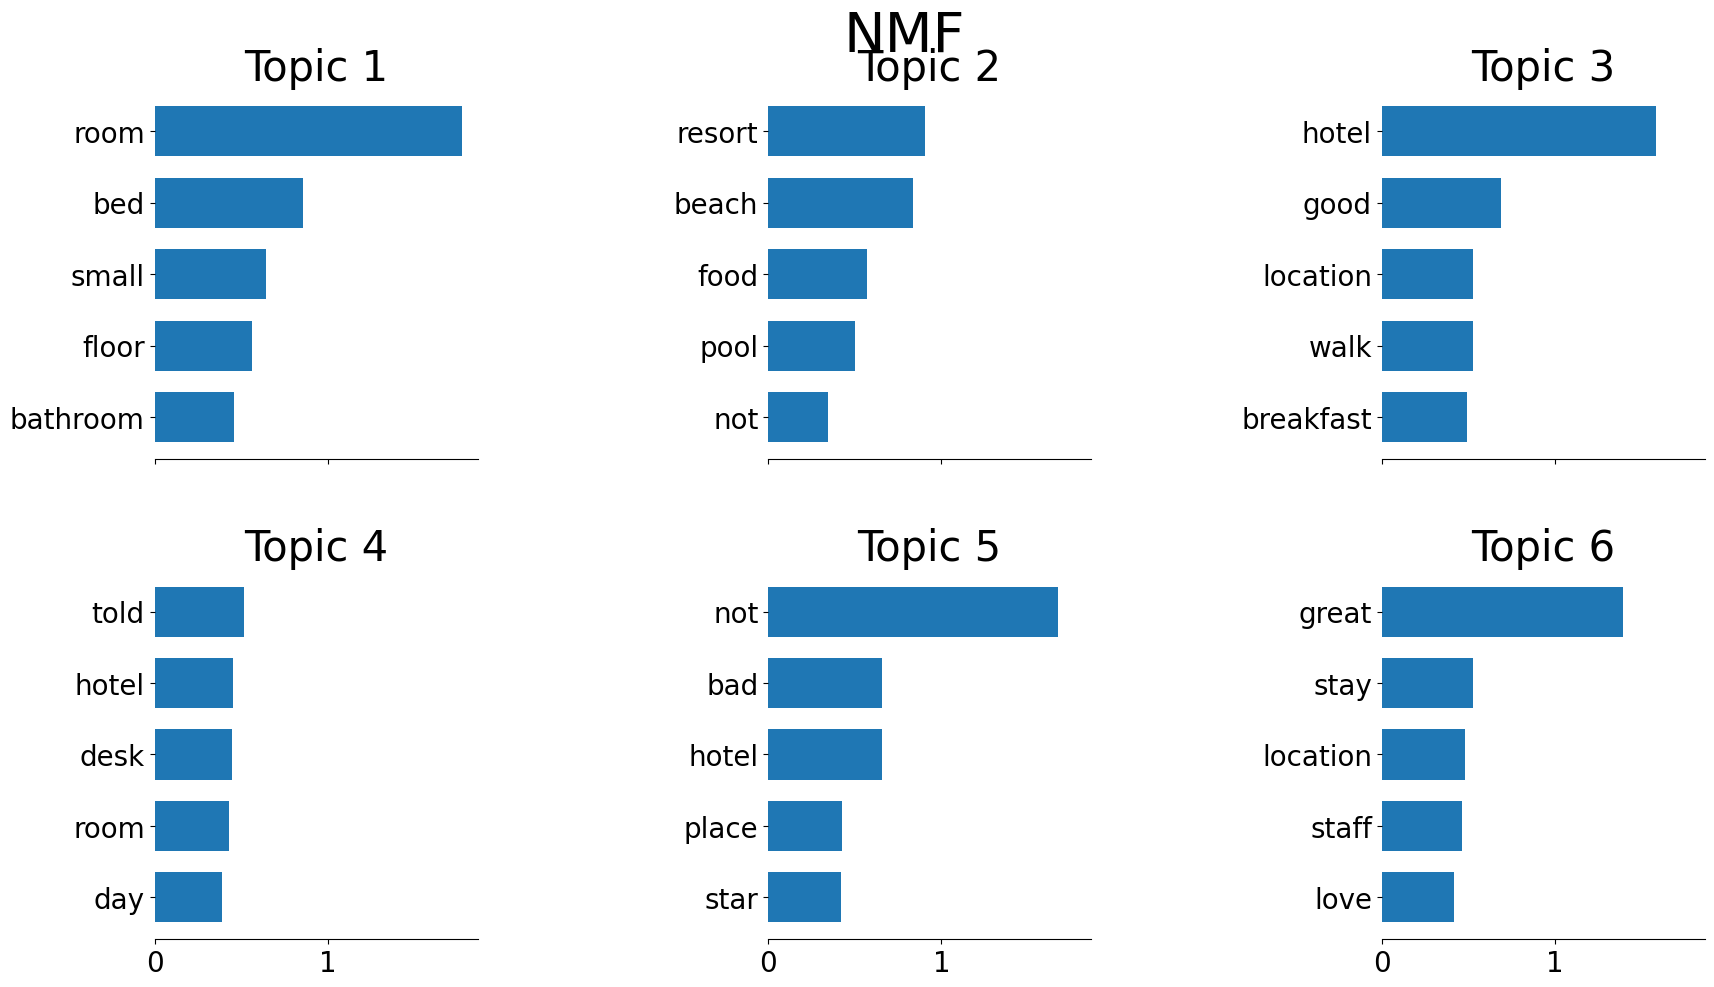

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf_model, feature_names);

## Conclusion of results

how business teams could leverage the outputs generated.

### **Topic #0: Room Facilities**

* Keywords: night, bathroom, floor, small, bed, room
* Interpretation: This topic seems to focus on aspects related to the room facilities and comfort.
* Business Insights: Business teams could use this topic to assess feedback related to room size, bathroom amenities, and overall comfort. Improving these aspects could enhance guest satisfaction and potentially lead to higher ratings.

### **Topic #1: Resort Amenities**

* Keywords: good, not, pool, food, beach, resort
* Interpretation: This topic likely relates to the quality and availability of resort amenities like pools, food options, and beach access.
* Business Insights: Understanding sentiments around amenities helps in targeted improvements. For example, if guests mention "good food" but also note areas for improvement, focusing on enhancing food quality and variety could boost guest experience and positive reviews.

### **Topic #2: Location and Breakfast**

* Keywords: excellent, breakfast, walk, location, good, hotel
* Interpretation: This topic suggests positive sentiments about the hotel's location and breakfast offerings.
* Business Insights: Highlighting positive aspects of location and breakfast in marketing materials can attract guests who prioritize these features. Moreover, ensuring consistency in breakfast quality and emphasizing nearby attractions can enhance guest satisfaction.

### **Topic #3: Service Interaction**

* Keywords: say, day, room, desk, hotel, told
* Interpretation: This topic appears to focus on interactions with hotel staff and service-related issues.
* Business Insights: Monitoring feedback related to staff interactions and service delivery is crucial. Addressing concerns promptly and enhancing training programs can improve guest interactions and overall satisfaction.

### **Topic #4: Overall Experience**

* Keywords: stay, star, place, hotel, bad, not
* Interpretation: This topic reflects general sentiments about the overall hotel experience, including guest expectations and perceived quality.
* Business Insights: Analyzing sentiments in this topic helps in identifying areas needing immediate attention, such as negative reviews mentioning "bad stay." Addressing these issues can prevent potential reputation damage and improve overall guest perception.

### **Topic #5: Positive Experience**

* Keywords: place, love, staff, location, stay, great
* Interpretation: This topic represents positive experiences and guest satisfaction with aspects like staff service, location, and overall stay.
* Business Insights: Leveraging positive sentiments can help in highlighting strengths in marketing campaigns and guest communications. Encouraging positive reviews and guest loyalty through targeted promotions can further enhance reputation and attract new guests.